### For the homeworks we are going to use the "[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#)"

The dataset can be used both for regression and classification tasks.

#### Source:

Kelwin Fernandes INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela Universidade de Aveiro

#### Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


The first two columns (url and time_delta) are non-predictive and should be ignored

The last column **shares** contains the value to predict.

### Regression
In the case of regression we want to predict the value of the share column.

### Classification
In the case of classification we want to predict one of two classes:

* *low* -- shares < 1,400
* *high* -- shares >= 1,400

### Metrics

#### Regression
To evaluate how good we are doing on the **regression** task we will use the Root Mean Squared Error (RMSE). RMSE is given by

$$
\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{\Big(d_i -f_i\Big)^2}}
$$


where:

* $n$ is the number of test samples
* $d_i$ is the ground truth value of the i-th sample
* $f_i$ is the predicted value of the i-th sample


#### Classification
To evaluate how good we are doing on the **classification** task we will use the accuracy metrics. Accuracy is given by

$$
\frac{TP+TN}{TP+TN+FP+FN}
$$

where:

* TP is the number of *correctly* classified positive samples
* TN is the number of *correctly* classified negative samples
* FP is the number of *incorrectly* classified positive samples
* FN is the number of *incorrectly* classified negative samples

In [1]:
from __future__ import annotations

import math
import time

from pandas import DataFrame
import pandas as pd
import random

In [22]:
# !wget https: // archive.ics.uci.edu / ml / machine-learning-databases / 00332 / OnlineNewsPopularity.zip
# !unzip OnlineNewsPopularity.zip

Format properly the names of the columns and remove the first two columns

In [2]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.iloc[:, 2:]

## Let's plot some of the columns

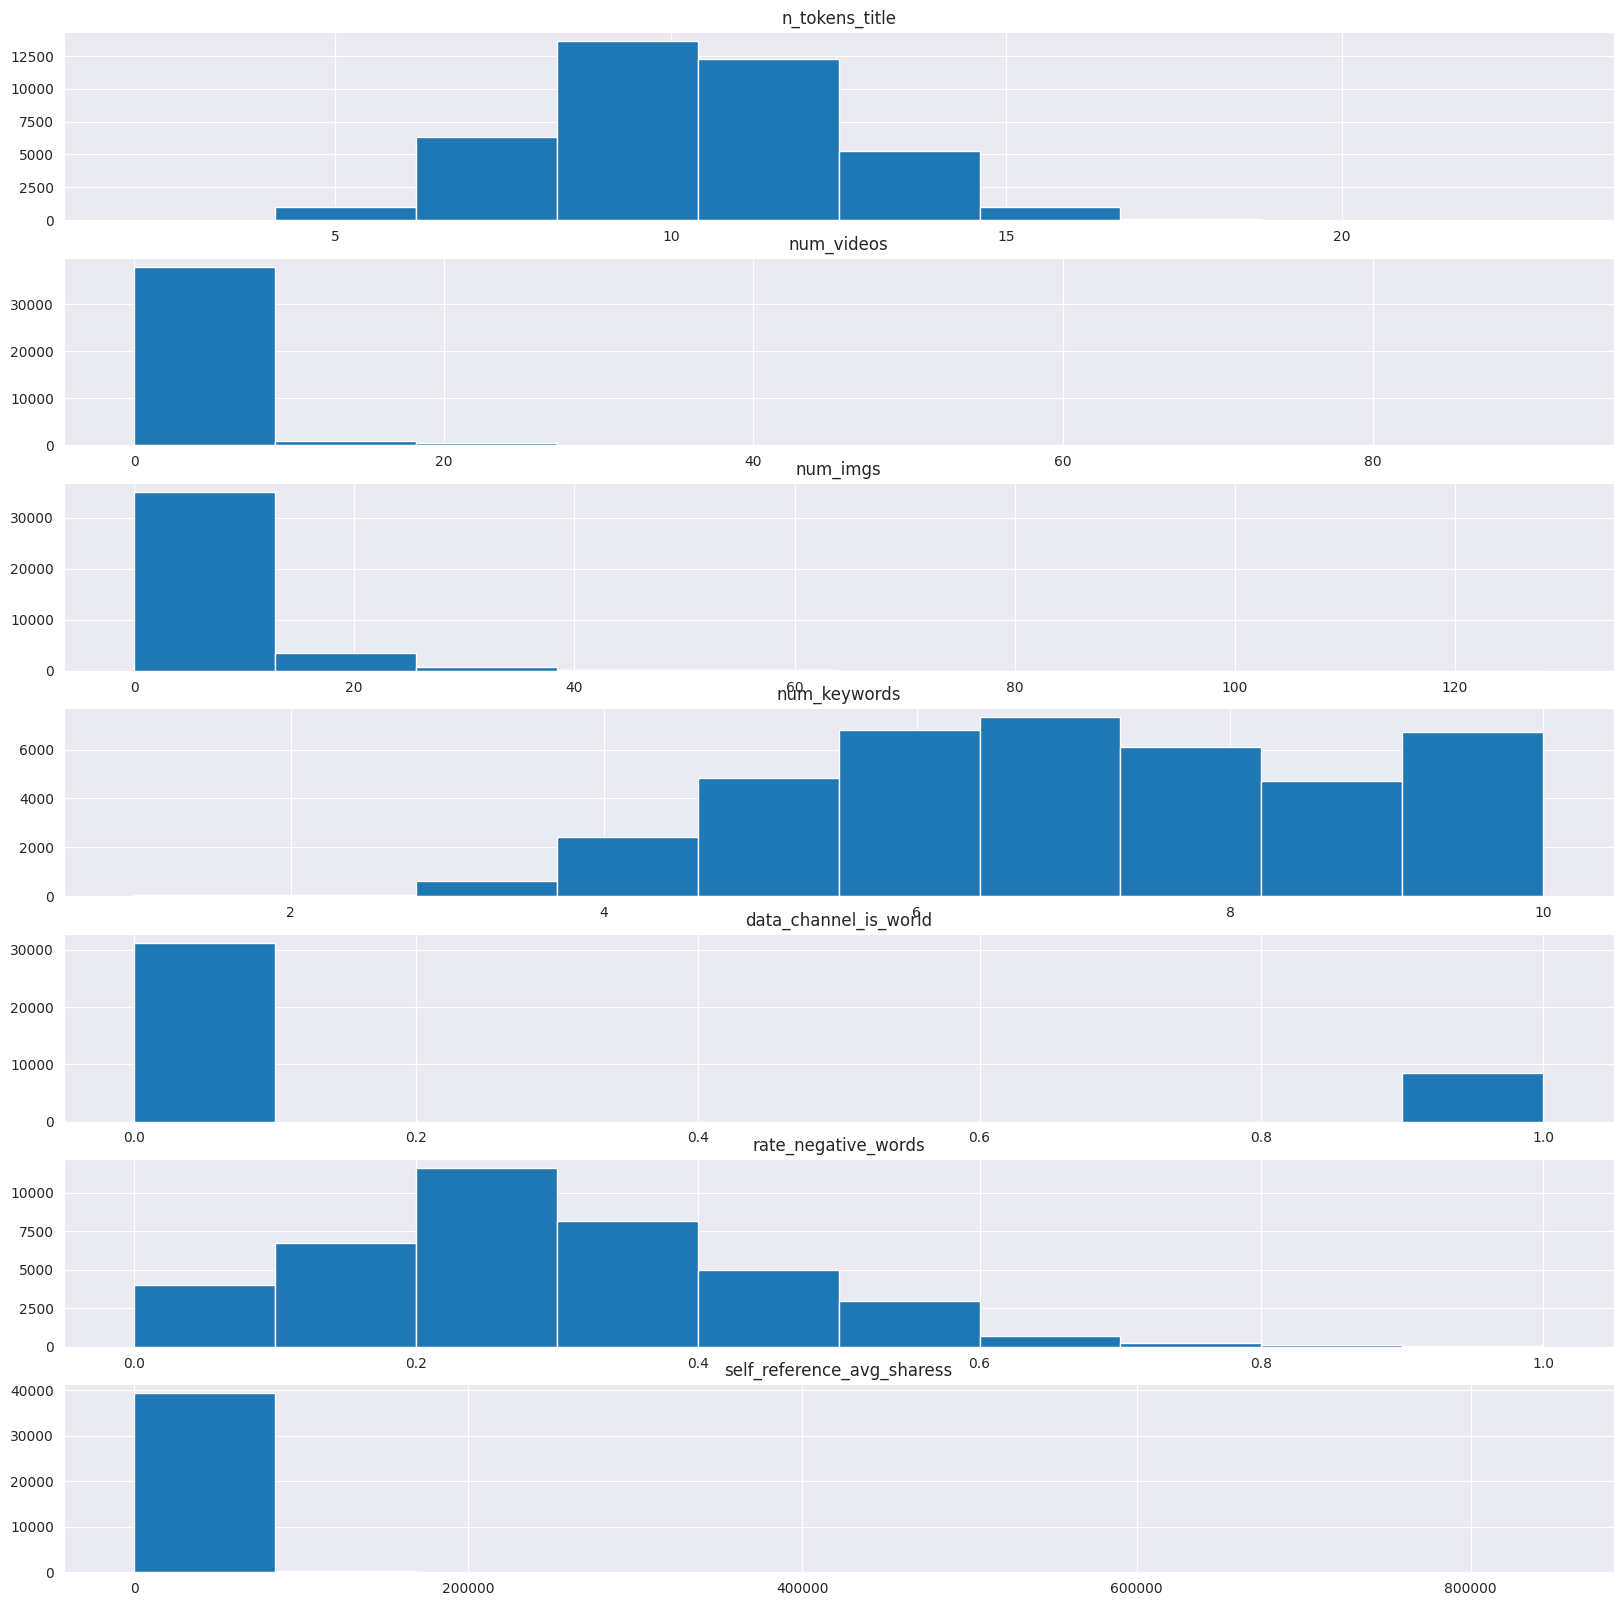

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    'n_tokens_title',
    'num_videos',
    'num_imgs',
    'num_keywords',
    'data_channel_is_world',
    'rate_negative_words',
    'self_reference_avg_sharess',
]

fig, ax = plt.subplots(len(columns_to_plot), 1, figsize=(20, 20))

for i, column in enumerate(columns_to_plot, 0):
    ax[i].hist(df[column])
    ax[i].title.set_text(column)

plt.show()

In [16]:
#calculate median for each column
median = df.median(axis=0)
avg = df.mean(axis=0)
print(avg)
print(median)
# compute the median of each attribute
medians = df.median()

# discretize each attribute to 0 or 1 based on the median
for column in df.columns:
    df[column] = (df[column] >= medians[column]).astype(int)

n_tokens_title                       10.398749
n_tokens_content                    546.514731
n_unique_tokens                       0.548216
n_non_stop_words                      0.996469
n_non_stop_unique_tokens              0.689175
num_hrefs                            10.883690
num_self_hrefs                        3.293638
num_imgs                              4.544143
num_videos                            1.249874
average_token_length                  4.548239
num_keywords                          7.223767
data_channel_is_lifestyle             0.052946
data_channel_is_entertainment         0.178009
data_channel_is_bus                   0.157855
data_channel_is_socmed                0.058597
data_channel_is_tech                  0.185299
data_channel_is_world                 0.212567
kw_min_min                           26.106801
kw_max_min                         1153.951682
kw_avg_min                          312.366967
kw_min_max                        13612.354102
kw_max_max   

In [59]:
from sklearn.model_selection import train_test_split

# TEST_SIZE = 20
# test_percentage = 20 / len(df)
test_percentage = 0.2
train_dataset = df.sample(frac=1 - test_percentage)
train_x = train_dataset.iloc[:, :-1]
train_y = train_dataset.iloc[:, -1]
test_dataset = df.sample(frac=test_percentage)
test_x = test_dataset.iloc[:, :-1]
test_y = test_dataset.iloc[:, -1]
print(test_dataset)
print(test_x)
print(test_y)
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
24940               1                 1                0                 1   
13773               1                 0                1                 0   
24683               1                 0                0                 0   
33402               1                 1                0                 1   
19362               1                 0                1                 0   
...               ...               ...              ...               ...   
34017               1                 1                0                 1   
19318               0                 1                0                 1   
25894               1                 0                1                 0   
20474               0                 0                1                 0   
14939               0                 0                1                 0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num

In [8]:
def score(predict, truth):
    # print(sum(predict==truth))
    return sum(predict == truth) / len(truth)

In [18]:
from sklearn import tree

start = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
print(time.time() - start)

0.21004152297973633


In [19]:
y_predict = clf.predict(test_x)
# print(y_predict)
# print(test_y)
print(score(y_predict, test_y))

0.9076806659099508


Decision Tree from scratch

In [63]:
from collections import Counter
from __future__ import annotations


class ScratchDecisionTree:
    class DecisionTreeNode:
        def __init__(self, name):
            self.attribute: str = name
            self.value = None
            # self.parent: DecisionTreeNode | None = None
            self.children: list[ScratchDecisionTree.DecisionTreeNode] = []
            self.result = None

    class Sample:
        def __init__(self, attributes: dict, classification):
            self.classification = classification
            self.attributes = attributes

        def get_attribute(self, attr):
            return self.attributes[attr]

    def __init__(self):
        self.root: ScratchDecisionTree.DecisionTreeNode | None = None

    def fit(self, x: DataFrame, y: DataFrame):
        assert len(x) == len(y)
        assert len(x) != 0
        samples = []
        index = 0
        for i, xx in x.iterrows():
            a = y.iloc[index]
            samples.append(self.Sample(xx.to_dict(), a))
            index += 1
        # samples = [self.Sample(xx, yy) for xx, yy in zip(x, y)]
        attributes = set(x.keys().tolist())
        assert len(attributes) != 0
        self.root = ScratchDecisionTree.build_decision_tree(samples, attributes, None)

    # def predict(self, x:DataFrame):
    #     assert self.root is not None
    #     for i,xx in x.iterrows():
    #         break
    #     b=self.Sample(xx.to_dict(),None)
    #     a=self.eval(b)
    #     return [self.eval(self.Sample(xx.to_dict(),None)) for i,xx in x.iterrows()]
    #
    # def eval(self, x: ScratchDecisionTree.Sample):
    #     node = self.root
    #     while not node.result:
    #         for nn in node.children:
    #             if x.get_attribute(node.attribute) == nn.value:
    #                 node = nn
    #                 break
    #         print("ERROR")
    #     return node.result
    @staticmethod
    def entropy(samples: list[ScratchDecisionTree.Sample]) -> float:
        if not samples:
            return 0
        p = sum(s.classification for s in samples)/len(samples)
        if p == 0 or p == 1:
            return 0
        return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

    @staticmethod
    def information_gain(attr, samples: list[ScratchDecisionTree.Sample]) -> float:
        return random.randint(0, 100)

        a = [s for s in samples if s.get_attribute(attr) == 0]
        b = [s for s in samples if s.get_attribute(attr) == 1]
        return ScratchDecisionTree.entropy(samples) - \
            len(a) / len(samples) * ScratchDecisionTree.entropy(a) - \
            len(b) / len(samples) * ScratchDecisionTree.entropy(b)

    @staticmethod
    def build_decision_tree(samples: list[ScratchDecisionTree.Sample], attributes: set[str], parent_most_common_result):
        new_root = ScratchDecisionTree.DecisionTreeNode(None)
        if not samples:
            new_root.result = parent_most_common_result
            return new_root
        classifications = [s.classification for s in samples]
        most_common_result = Counter(classifications).most_common(1)[0][0]
        if len(classifications) == 1 or len(attributes) == 0:
            new_root.result = most_common_result
            return new_root
        splitting_attribute = max(attributes, key=lambda x: ScratchDecisionTree.information_gain(x, samples))
        new_root.attribute = splitting_attribute
        # values = {}
        # for sample in samples:
        #     if sample.get_attribute(splitting_attribute) not in values:
        #         values[sample.get_attribute(splitting_attribute) ] = []
        #     values[sample.get_attribute(splitting_attribute)].append(sample)
        # for value, v_samples in values.items():
        for value in [0, 1]:
            v_samples = [s for s in samples if s.get_attribute(splitting_attribute) == value]
            subtree = ScratchDecisionTree.build_decision_tree(
                v_samples,
                attributes - {splitting_attribute},
                None if v_samples else most_common_result
            )
            subtree.value = value
            new_root.children.append(subtree)
        return new_root

# clf = ScratchDecisionTree()
# time_start = time.time()
# clf.fit(train_x, train_y)
# print(time.time() - time_start)
# print("a")
# y_predict = clf.predict(test_x)

In [64]:
clf = ScratchDecisionTree()
time_start = time.time()
clf.fit(train_x, train_y)
print(time.time() - time_start)


6.457012176513672


In [65]:
def predict(x: DataFrame, root: ScratchDecisionTree.DecisionTreeNode):
    # for i,xx in x.iterrows():
    #     break
    # b=ScratchDecisionTree.Sample(xx.to_dict(),None)
    # a=eval(b,root)
    return [eval(ScratchDecisionTree.Sample(xx.to_dict(), None), root) for i, xx in x.iterrows()]


def eval(x: ScratchDecisionTree.Sample, root: ScratchDecisionTree.DecisionTreeNode):
    node = root
    while node.result is None:
        found = False
        for nn in node.children:
            if x.get_attribute(node.attribute) == nn.value:
                node = nn
                found = True
                break
        if not found:
            print("ERROR")
    return node.result


print("a")
y_predict = predict(test_x, clf.root)
# # print(y_predict)
# # print(test_y)
print(score(y_predict, test_y))

a
0.9052843990414933
